In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    "Round of 64":[240, 260, 250, 250], 
    "Round of 32":[180, 180, 180, 180], 
    "Round of 16":[80,  80, 40, 80], 
    "Elite 8":    [0 ,   0, 0  , 80  ], 
    "Final 4":    [0  ,   0, 0  ,   0], 
    "Final":      [0  ,   0, 0  , 0  ],
    "Percentile": [77 ,  82, 66 , 91 ]
}
rows = [
    "LDA",
    "SVM",
    "High Seed",
    "BPI"
]

df = pd.DataFrame(data, index=rows)

df["Total"] = df.iloc[:, :6].sum(1)

## Overall Data

In [3]:
df.sort_values(["Total"], ascending = False)

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final,Percentile,Total
BPI,250,180,80,80,0,0,91,590
SVM,260,180,80,0,0,0,82,520
LDA,240,180,80,0,0,0,77,500
High Seed,250,180,40,0,0,0,66,470


## Round Accuracy

Note that this is not exactly the accuracy for later rounds since errors propagate. Thus even if an error was made in a previous round, the model can still get points in later rounds, so while the matchup it originally made the prediction based off was invalid, it was still "correct" in a sense.

In [4]:
accuracy = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]] * 100 / 320
accuracy

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final
LDA,75.000,56.25,25.0,0.0,0.0,0.0
SVM,81.250,56.25,25.0,0.0,0.0,0.0
High Seed,78.125,56.25,12.5,0.0,0.0,0.0
BPI,78.125,56.25,25.0,25.0,0.0,0.0


## Cumulative Scores

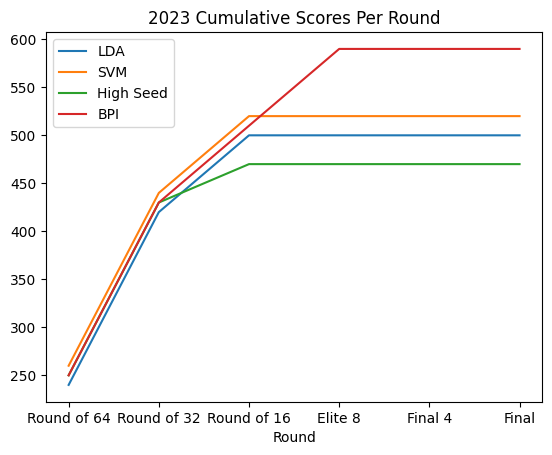

In [6]:
cumulative = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]].cumsum(1)
cumulative = cumulative.transpose()
cumulative.index.name = "Round"
cumulative.plot(title="2023 Cumulative Scores Per Round")
plt.savefig("2023-cumulative-results.png")
plt.show()